<a href="https://colab.research.google.com/github/malu-shamesh/customer-segmentation/blob/main/purchase_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install numpy

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df_purchase = pd.read_csv('/content/drive/MyDrive/purchase data.csv')
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


Data exploration

In [5]:
df_purchase.describe()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,5.869300e+04,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,...,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,2.000003e+08,349.431074,0.249399,0.844309,0.691973,0.840799,0.248070,1.392074,1.780999,2.006789,...,0.042799,0.117851,0.035865,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,1.443167e+02,212.045058,0.432669,1.633083,1.498734,1.631628,0.431897,0.091139,0.170868,0.046867,...,0.202405,0.322434,0.185954,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,2.000000e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1.260000,1.870000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,2.000001e+08,161.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.340000,1.580000,1.970000,...,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,2.000003e+08,343.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.390000,1.880000,2.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,2.000004e+08,530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.470000,1.890000,2.060000,...,0.000000,0.000000,0.000000,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,2.000005e+08,730.000000,1.000000,5.000000,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,...,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


In [6]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

Data segmentation

Import model

In [7]:
DATA_PATH = "/content/drive/MyDrive"

scaler = pickle.load(open(DATA_PATH+'/scaler.pickle', 'rb'))
pca = pickle.load(open(DATA_PATH+'/pca.pickle', 'rb'))
kmeans_pca = pickle.load(open(DATA_PATH+'/kmeans_pca.pickle', 'rb'))

Standardisation

In [8]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

In [9]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

K-Means with PCA

In [10]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [11]:
df_purchase_predictors = df_purchase.copy()

In [12]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

Descriptive analysis by segments

Data analysis by customer

In [13]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [14]:
df_purchase_predictors.corr()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
ID,1.000000,0.004188,0.051820,0.020567,0.090972,0.020394,0.051691,0.002516,0.002127,0.003461,...,-0.000461,0.000039,0.120161,0.115321,0.064591,0.097770,0.065465,-0.016107,0.010088,0.023891
Day,0.004188,1.000000,0.027664,0.006542,0.029790,0.016790,0.038555,-0.088729,-0.059017,0.784073,...,-0.097806,-0.103716,0.002858,-0.000652,-0.000083,-0.001381,0.001231,-0.001613,-0.004950,0.003288
Incidence,0.051820,0.027664,1.000000,0.896919,0.800987,0.245340,0.212054,-0.047535,-0.054927,-0.001171,...,0.018308,0.029650,-0.033865,-0.009384,0.074272,0.043699,0.068995,0.061943,0.102785,0.017158
Brand,0.020567,0.006542,0.896919,1.000000,0.672195,0.327625,0.240136,-0.028521,-0.021861,-0.017249,...,0.019962,0.051266,-0.073891,-0.021781,0.123255,0.071956,0.125672,0.129863,0.204017,0.024243
Quantity,0.090972,0.029790,0.800987,0.672195,1.000000,0.176979,0.167061,-0.051851,-0.064733,0.001505,...,0.019026,0.016775,-0.001506,0.011151,0.055112,0.045551,0.059760,0.044320,0.065191,0.023832
Last_Inc_Brand,0.020394,0.016790,0.245340,0.327625,0.176979,1.000000,0.897172,-0.031072,0.002651,-0.000741,...,-0.006050,0.007981,-0.074504,-0.021908,0.123250,0.071811,0.125492,0.129877,0.204292,0.023659
Last_Inc_Quantity,0.051691,0.038555,0.212054,0.240136,0.167061,0.897172,1.000000,-0.041468,-0.003164,0.013523,...,-0.009409,0.002718,-0.034647,-0.009347,0.074624,0.043954,0.069282,0.062375,0.103722,0.016727
Price_1,0.002516,-0.088729,-0.047535,-0.028521,-0.051851,-0.031072,-0.041468,1.000000,0.110591,-0.001557,...,0.053111,-0.007939,0.004131,0.003360,0.005218,0.003757,0.001258,0.003394,0.004144,0.001664
Price_2,0.002127,-0.059017,-0.054927,-0.021861,-0.064733,0.002651,-0.003164,0.110591,1.000000,-0.007581,...,0.028616,0.036371,0.004221,0.003749,-0.000099,0.002828,0.004346,0.006035,0.006672,-0.005972
Price_3,0.003461,0.784073,-0.001171,-0.017249,0.001505,-0.000741,0.013523,-0.001557,-0.007581,1.000000,...,-0.097998,-0.059765,0.003019,-0.000912,-0.003149,-0.003468,-0.005180,-0.007333,-0.005573,-0.000878


In [15]:
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [16]:
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [17]:
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [18]:
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [19]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,2.0
200000004,85,11,0.129412,2.0
200000005,111,13,0.117117,1.0


Segment proportions

In [20]:
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0.0,0.206
1.0,0.220
2.0,0.378
3.0,0.196


Text(0.5, 1.0, 'Segment Proportions')

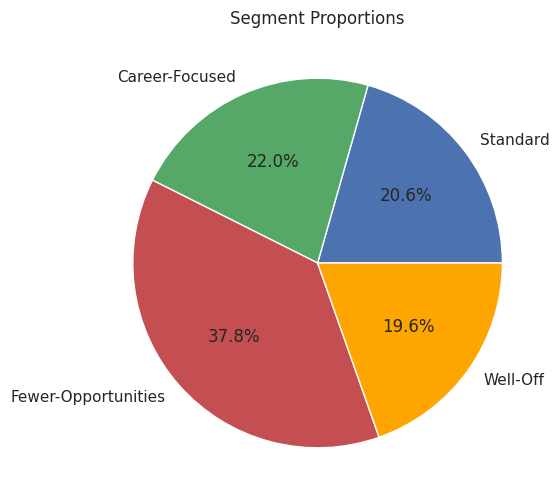

In [21]:
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'],
        autopct = '%1.1f%%',
        colors = ('b', 'g', 'r', 'orange'))
plt.title('Segment Proportions')

Purchase incidence

In [22]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0.0,117.699029,24.902913,0.212773
1.0,123.454545,39.827273,0.283102
2.0,113.730159,22.756614,0.201588
3.0,117.295918,34.602041,0.284478


In [23]:
segments_std = df_purchase_descr.groupby(['Segment']).std()

Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

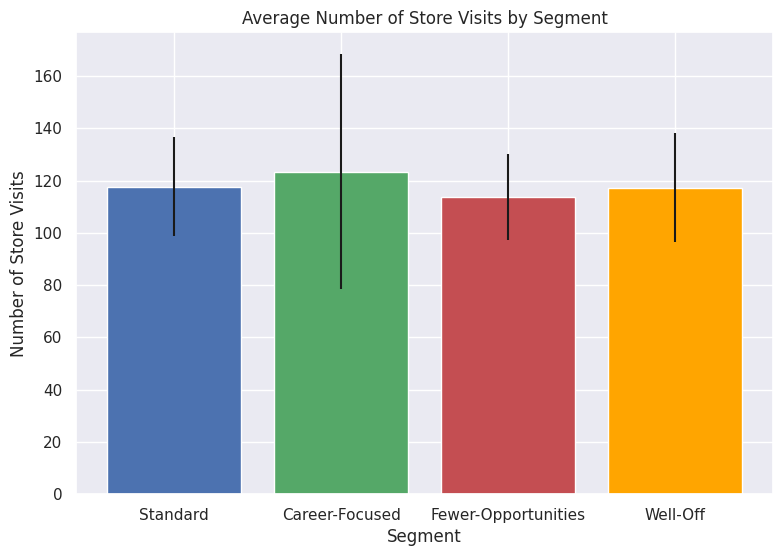

In [24]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

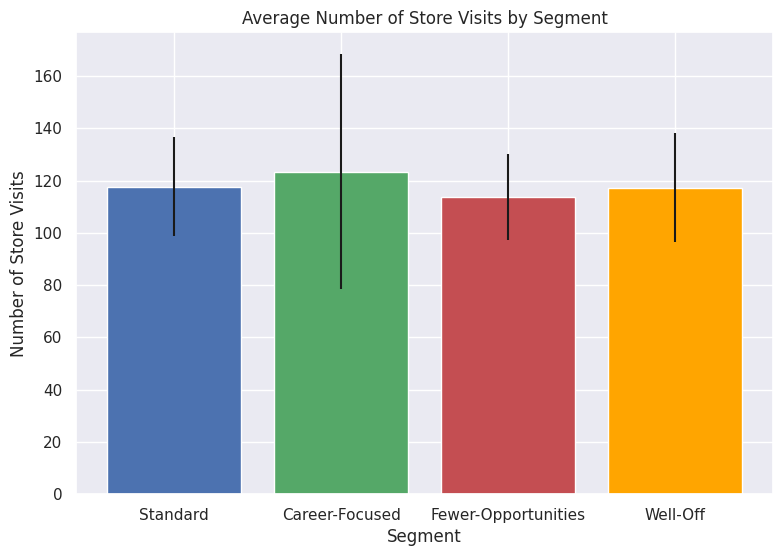

In [25]:
plt.figure(figsize = (9, 6))
plt.bar(x = segments_mean.index,
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

Text(0.5, 1.0, 'Number of Purchases by Segment')

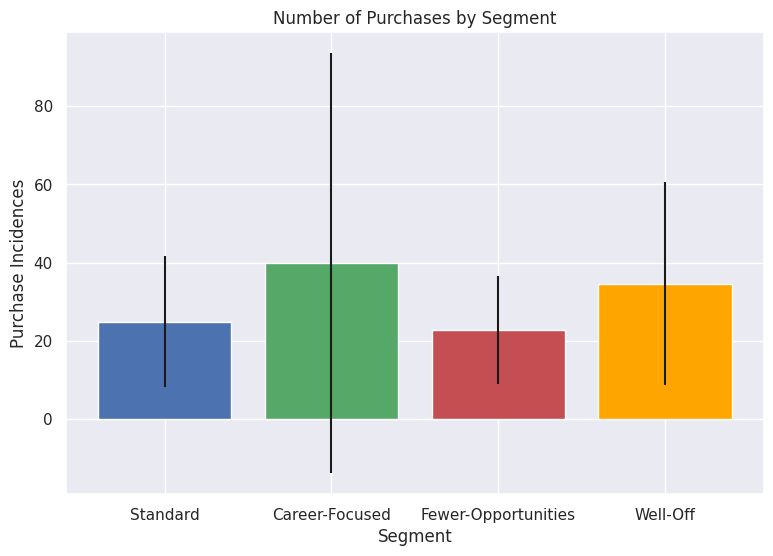

In [26]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
        height = segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segment')

Text(0.5, 1.0, 'Average Number of Purchases by Segment')

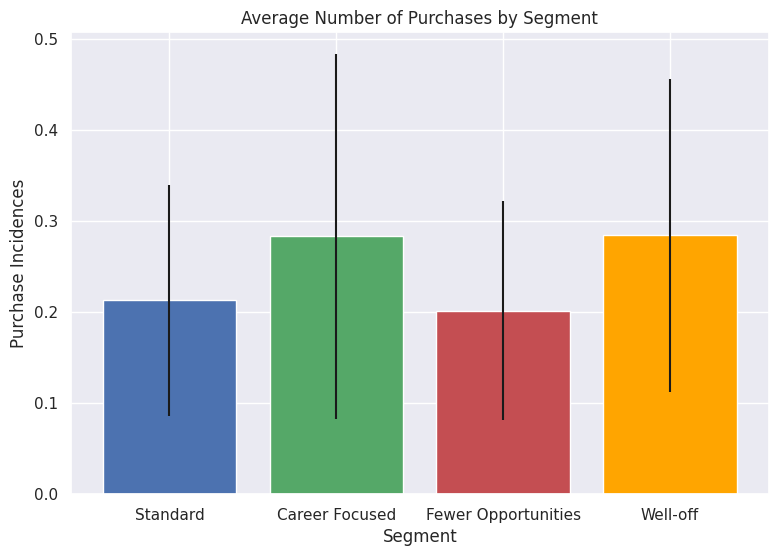

In [27]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard','Career Focused','Fewer Opportunities','Well-off'),
        height = segments_mean['Average_N_Purchases'],
        yerr = segments_std['Average_N_Purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment')

Brand choice

In [28]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [29]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,2,200000500
58648,1,0,0,0,0,2,200000500
58674,0,1,0,0,0,2,200000500
58687,0,1,0,0,0,2,200000500


In [30]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

In [31]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()
mean_brand_choice

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0.0,0.251186,0.396502,0.156481,0.059474,0.136357
1.0,0.072871,0.146808,0.039976,0.112395,0.627951
2.0,0.137567,0.681190,0.020923,0.061548,0.098772
3.0,0.041928,0.117422,0.030610,0.613623,0.196417


In [32]:
outcome = brand_dummies.groupby(['Segment', 'ID']).mean()
outcome

Brand_1   Brand_2   Brand_3   Brand_4   Brand_5
Segment ID                                                         
0       200000024  0.181818  0.727273  0.000000  0.000000  0.090909
        200000027  0.222222  0.444444  0.111111  0.111111  0.111111
        200000032  0.916667  0.083333  0.000000  0.000000  0.000000
        200000039  0.300000  0.566667  0.000000  0.000000  0.133333
        200000050  0.142857  0.476190  0.000000  0.333333  0.047619
...                     ...       ...       ...       ...       ...
3       200000473  0.010753  0.021505  0.000000  0.924731  0.043011
        200000484  0.133333  0.866667  0.000000  0.000000  0.000000
        200000486  0.000000  0.058824  0.000000  0.941176  0.000000
        200000487  0.000000  0.000000  0.090909  0.909091  0.000000
        200000489  0.011236  0.022472  0.000000  0.921348  0.044944

[500 rows x 5 columns]

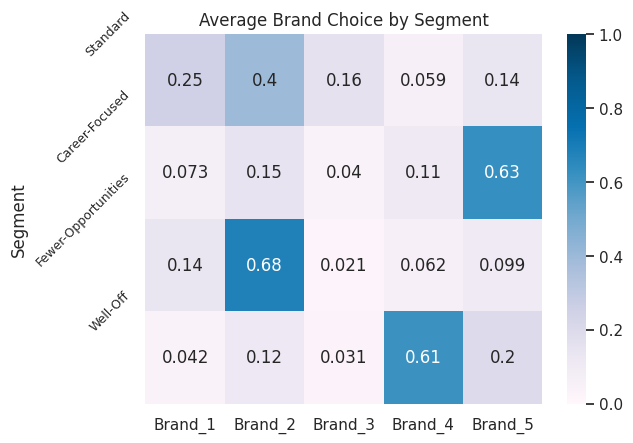

In [33]:
sns.heatmap(mean_brand_choice,
            vmin = 0,
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2, 3], ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'], rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

Revenue

In [34]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

<ipython-input-34-e8a5b8c7b3e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']


,Segment,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,2258.90
3,3,699.47


In [35]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()

<ipython-input-35-ae7f45fa9ccc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']


In [36]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Revenue Brand 3','Segment']].groupby(['Segment'], as_index = False).sum()

<ipython-input-36-4bdd27ef8c3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']


In [37]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Revenue Brand 4','Segment']].groupby(['Segment'], as_index = False).sum()

<ipython-input-37-7cb90c8fb3ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']


In [38]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Revenue Brand 5','Segment']].groupby(['Segment'], as_index = False).sum()

<ipython-input-38-c788b21c86af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']


In [39]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [40]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Standard',
                                                                           1:'Career-Focused',
                                                                           2:'Fewer-Opportunities',
                                                                           3:'Well-Off'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
